In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from os import path
import glob
sns.set_style('white')
#color_scheme = {"Fed": "#648fff","Starved":"#fe6100" }
color_scheme = {"Fed": "dodgerblue","Starved": "darkorange"}

In [2]:
sample_list = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/sample_list.csv",sep=",",header=0)
hemocyte_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/hemocyte_coordinates.csv", sep="\t",header=0)
abdomen_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/abdomen_coordinates.csv", sep="\t",header=0) 
figure_outputs = "/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/"

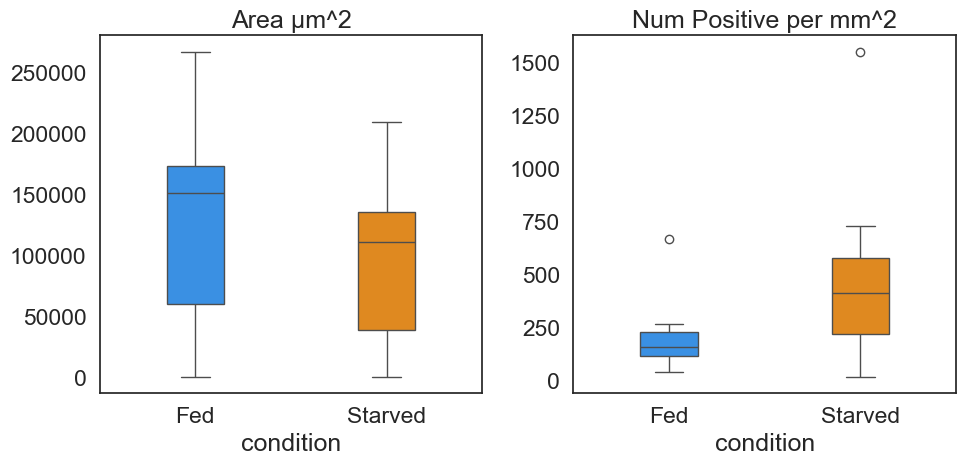

In [3]:
sns.set(font_scale=1.5)
sns.set_style("white")
group_desc = abdomen_coordinates.groupby(['condition']).describe().T

#print(group_desc)

fig, ax = plt.subplots(1,2, figsize=(10,5))


sns.boxplot(data=group_desc.loc['Area µm^2'], ax= ax[0],width=0.3, palette=color_scheme)
ax[0].set_title("Area µm^2")

sns.boxplot(data=group_desc.loc['Num Positive per mm^2'], ax = ax[1],width=0.3,palette=color_scheme)
ax[1].set_title("Num Positive per mm^2")

fig.tight_layout()
fig.savefig(figure_outputs+"annotation_area_numpos.png")


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/2636150211.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/2636150211.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/2636150211.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/2636150211.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0

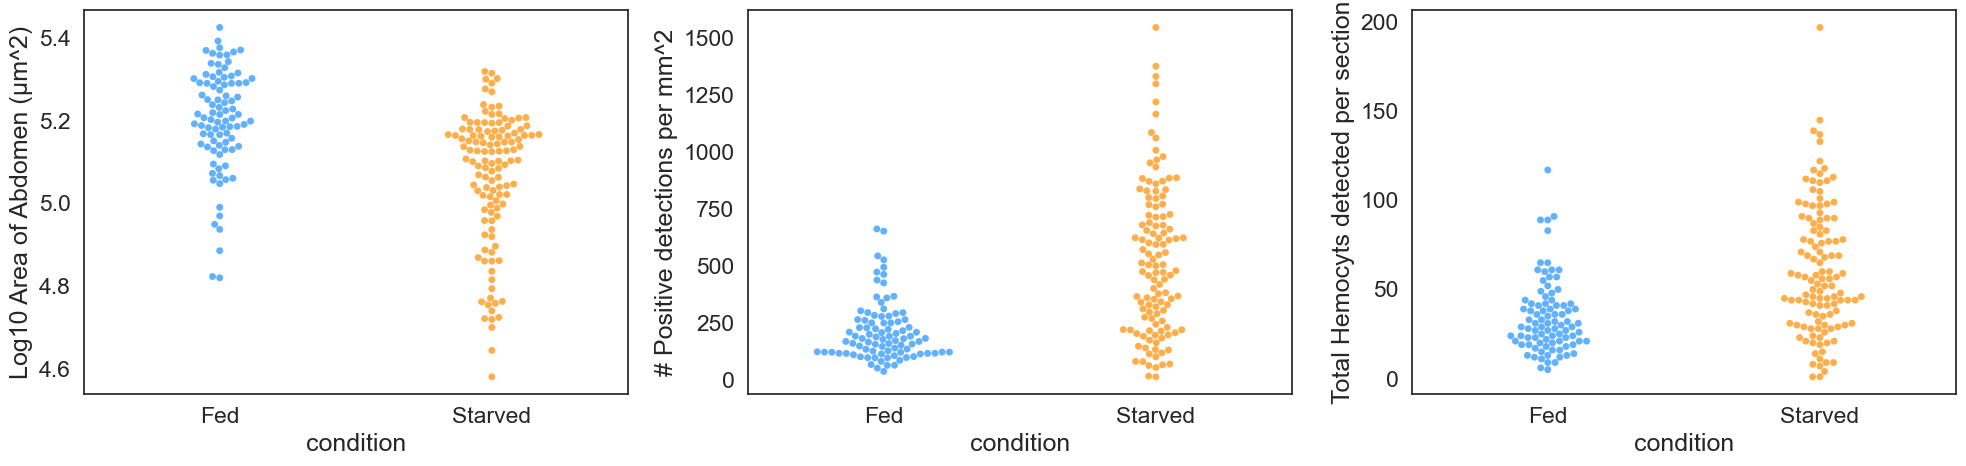

In [32]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,3, figsize=(20,5))

#sns.violinplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0],inner=None, linewidth = 0)
sns.swarmplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme, alpha=0.7)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_yticklabels(ax[0].get_yticklabels())
ax[0].set_ylabel("Log10 Area of Abdomen (µm^2)")

#sns.violinplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'], ax = ax[1],inner=None,linewidth = 0)
sns.swarmplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'] , ax= ax[1], palette=color_scheme, alpha=0.7)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_yticklabels(ax[1].get_yticklabels())
ax[1].set_ylabel("# Positive detections per mm^2")

sns.swarmplot(y= abdomen_coordinates['Num Detections'], x= abdomen_coordinates['condition'] , ax= ax[2], palette=color_scheme, alpha=0.7)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_yticklabels(ax[2].get_yticklabels())
ax[2].set_ylabel("Total Hemocyts detected per section")

fig.tight_layout()
fig.savefig(figure_outputs+"annotation_area_numpos_swarm.png")



[Text(0.5, 0, 'Num Positive per mm^2'), Text(0, 0.5, '# Abdomens')]

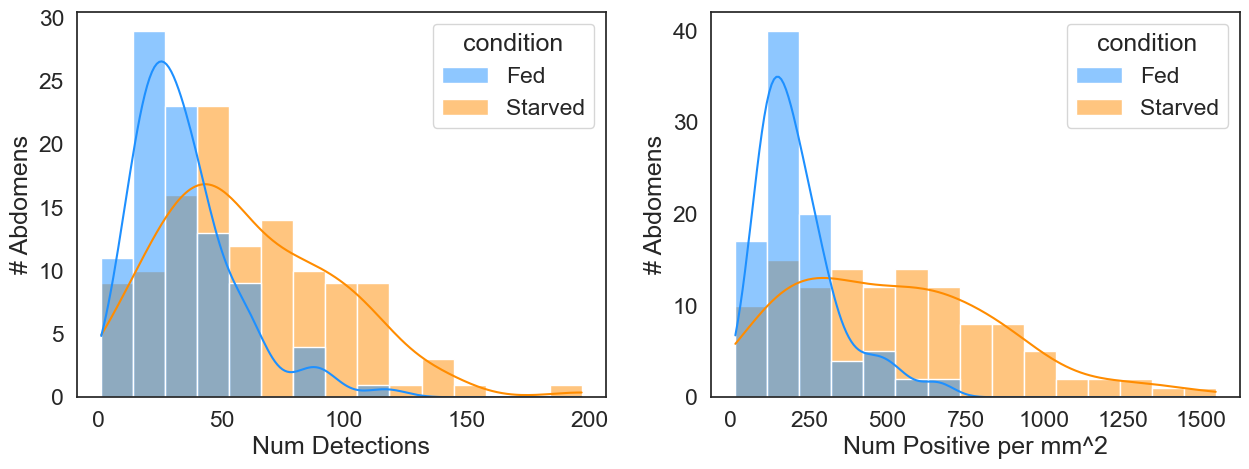

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = abdomen_coordinates, 
             x= 'Num Detections', bins=15,kde=True, hue='condition',palette=color_scheme,ax=ax[0])
ax[0].set(xlabel='Num Detections', ylabel='# Abdomens')

sns.histplot(data = abdomen_coordinates, 
             x= 'Num Positive per mm^2', bins=15,kde=True, hue='condition',palette=color_scheme,ax=ax[1])
ax[1].set(xlabel='Num Positive per mm^2', ylabel='# Abdomens')
#fig.savefig(figure_outputs+"annotation_numdetect_dist.png")


In [6]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)

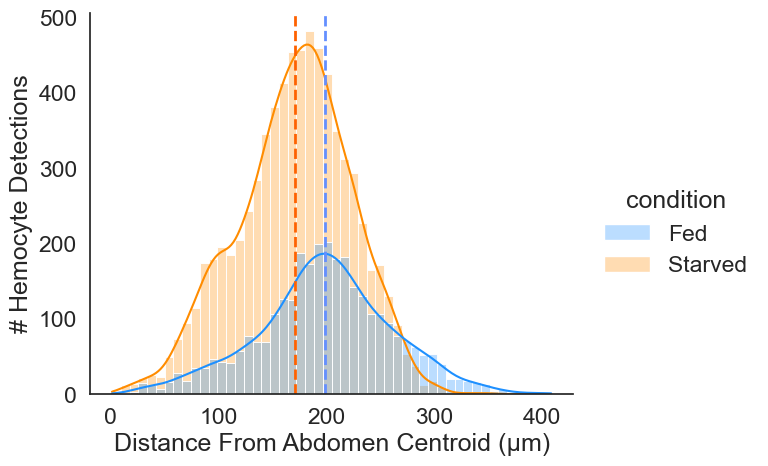

In [7]:

centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='centroid_distances', hue='condition',kde=True, bins=50,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='Distance From Abdomen Centroid (µm)', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

In [8]:
import scipy
from scipy.stats import ttest_ind
test_hypothesis = scipy.stats.ttest_ind(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'], 
                                        hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'], 
                                        axis=0, 
                                        equal_var=False, 
                                        nan_policy='omit', 
                                        alternative='greater', 
                                        trim=0)

print(test_hypothesis)
print("Test whether fed centroid distances > starved, P value < 0.05 :", test_hypothesis.pvalue < 0.05 )

TtestResult(statistic=21.528511495324988, pvalue=8.992307417278065e-99, df=5103.607446804819)
Test whether fed centroid distances > starved, P value < 0.05 : True


In [9]:
# For each fly, create numpy 3d array of (x,y,z) coordinates and calculate Ripley's L-statistic
hemocyte_coordinates[['fly','section','reporter']] = hemocyte_coordinates['Image'].str.split('_',expand=True)
for fly in hemocyte_coordinates['fly'].unique():
    fly_coords = np.array(hemocyte_coordinates[['centroid_x_zeroscaled','centroid_y_zeroscaled','section']])
    #fig = px.scatter_3d(x=fly_coords[:,0], y=fly_coords[:,1],z=fly_coords[:,2], color=fly_coords[:,2])
    fig = go.Figure(data=[go.Scatter3d(
    x=fly_coords[:,0],
    y=fly_coords[:,1],
    z=fly_coords[:,2].astype(int),
    mode='markers', 
    marker=dict(
        size=2, color= 'darkslategray'
    ))])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()
    #lstat = ripleys_l(distances_i, support, N, area)
    break

In [10]:
# Scale all centroid distances by (sqrt of max dist of Fed abdomes * max dist of starved abdomens)*scaling_factor
max_fed = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'])
max_starved = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'])
scaling_factor = 1/100
print(np.sqrt(max_fed*max_starved)*scaling_factor) 
hemocyte_coordinates['scaled_centroid_distances'] = hemocyte_coordinates['centroid_distances']/(np.sqrt(max_fed*max_starved)*scaling_factor)
hemocyte_coordinates[['scaled_centroid_distances', 'centroid_distances']]

4.026926232296052


,scaled_centroid_distances,centroid_distances
0,49.115818,197.785775
1,48.122543,193.785930
2,48.215447,194.160047
3,48.260536,194.341619
4,46.622657,187.746001
...,...,...
10300,50.995101,205.353511
10301,53.062528,213.678885
10302,52.905139,213.045090
10303,51.088157,205.728239


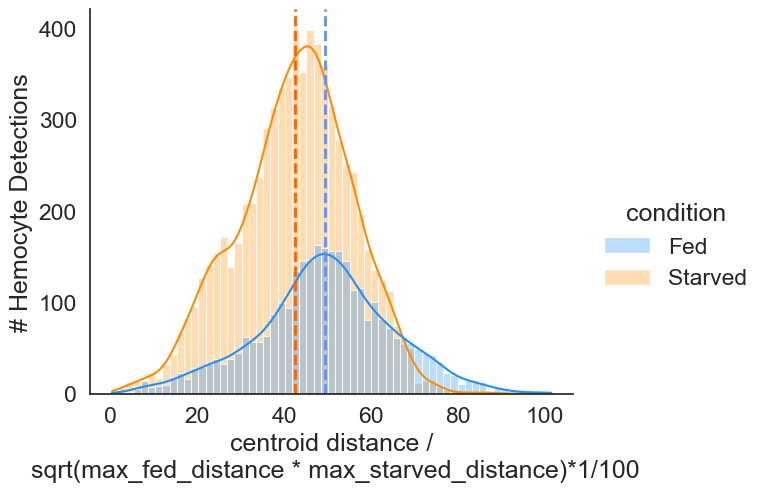

In [11]:
centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='scaled_centroid_distances', hue='condition',kde=True,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='centroid distance /\n sqrt(max_fed_distance * max_starved_distance)*1/100', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['scaled_centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['scaled_centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

In [12]:
test_hypothesis = scipy.stats.ttest_ind(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['scaled_centroid_distances'], 
                                        hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['scaled_centroid_distances'], 
                                        axis=0, 
                                        equal_var=False, 
                                        nan_policy='omit', 
                                        alternative='greater', 
                                        trim=0)

print(test_hypothesis)
print("Test whether fed centroid distances > starved, P value < 0.05 :", test_hypothesis.pvalue < 0.05 )

TtestResult(statistic=21.528511495324977, pvalue=8.992307417280117e-99, df=5103.607446804819)
Test whether fed centroid distances > starved, P value < 0.05 : True


90 118


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/3799166509.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/3799166509.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_80973/3799166509.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(1051.2045454545453, 0.5, '% abdomen area occupied by hemocytes')

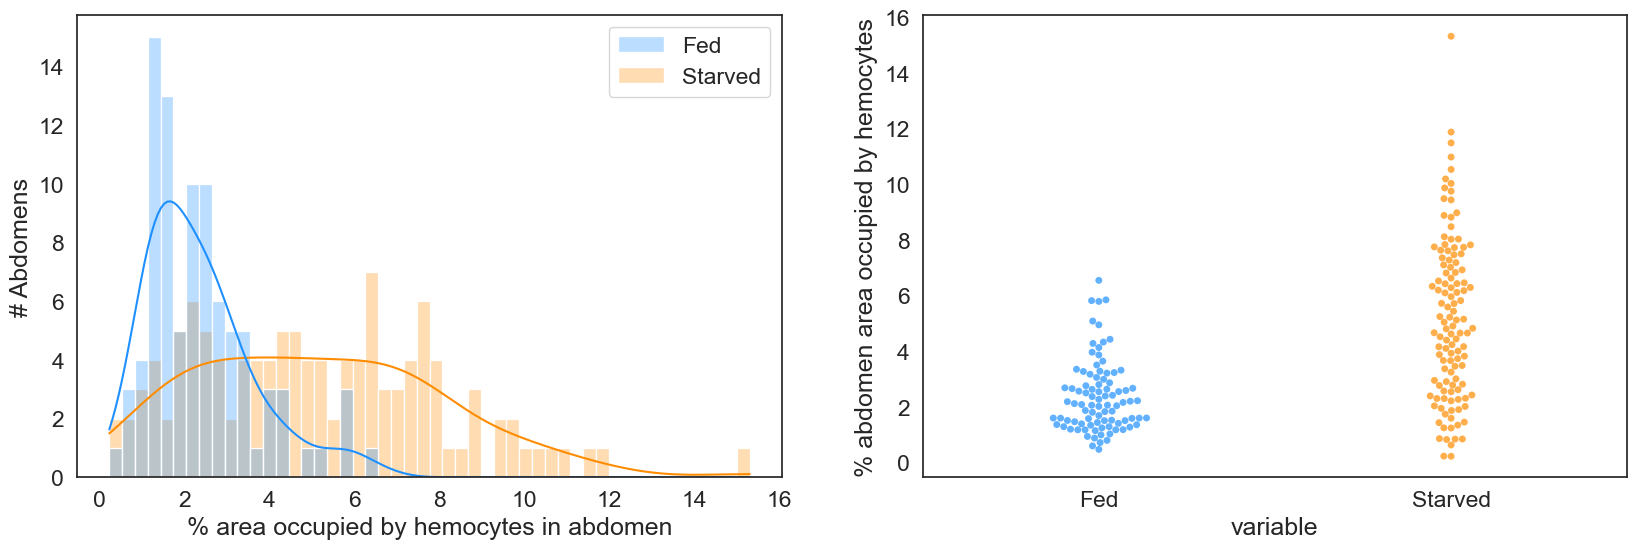

In [31]:
starved, fed = [],[]
for image in hemocyte_coordinates['Image'].unique(): 
    hemocyte_area_sum = hemocyte_coordinates.loc[hemocyte_coordinates['Image']== image]['Cell: Area'].sum()
    abdomen_area = abdomen_coordinates.loc[abdomen_coordinates['Image'] == image]['Area µm^2'].item()
    condition = abdomen_coordinates.loc[abdomen_coordinates['Image'] == image]['condition'].item()
    #print(image,abdomen_area,condition)
    if condition == "Fed":
        fed.append(100*hemocyte_area_sum/abdomen_area)
    else:
        starved.append(100*hemocyte_area_sum/abdomen_area)
    #break
print(len(fed),len(starved))
hemocyte_area_per_abdomen = pd.DataFrame({'Fed': pd.Series(fed), 'Starved': pd.Series(starved)})
hemocyte_area_per_abdomen

hemocyte_area_per_abdomen_melt = hemocyte_area_per_abdomen.melt()

fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.histplot(hemocyte_area_per_abdomen,kde=True, bins=50,palette=color_scheme, alpha=0.3, ax=ax[0])
ax[0].set(xlabel='% area occupied by hemocytes in abdomen', ylabel='# Abdomens')

sns.swarmplot(y= hemocyte_area_per_abdomen_melt['value'], x= hemocyte_area_per_abdomen_melt['variable'] , ax= ax[1], palette=color_scheme, alpha=0.7)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_yticklabels(ax[1].get_yticklabels())
ax[1].set_ylabel("% abdomen area occupied by hemocytes")



(-300.0, 300.0)

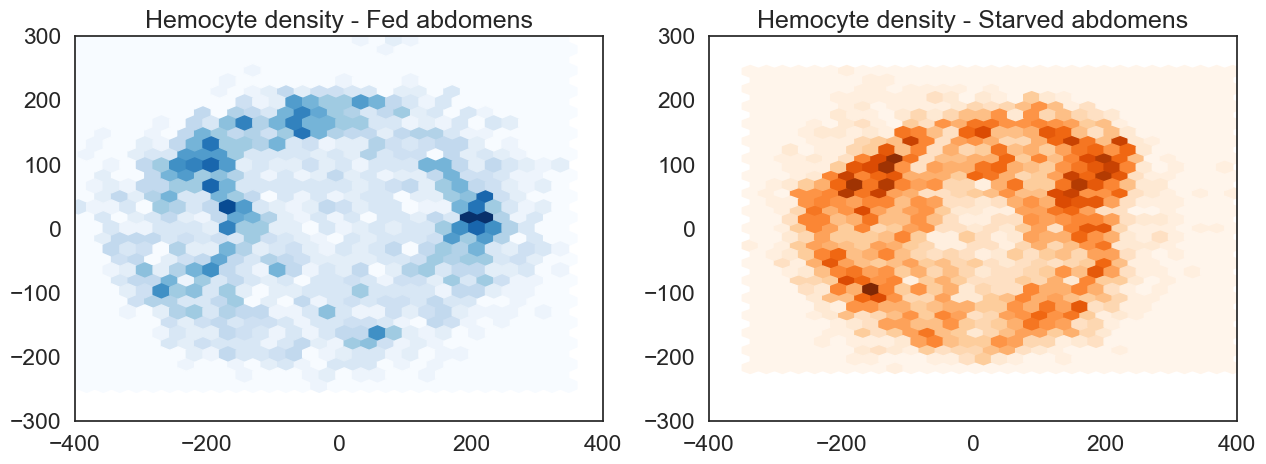

In [14]:
# point density plot - all replicates per group 
fig, ax = plt.subplots(1,2,figsize=(15,5))
fed_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_x_zeroscaled']
fed_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_y_zeroscaled']

starved_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_x_zeroscaled']
starved_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_y_zeroscaled']

ax[0].hexbin(fed_x,fed_y, bins=20, gridsize=30, cmap = "Blues")
ax[0].set_title("Hemocyte density - Fed abdomens")
ax[0].set_xlim(-400,400)
ax[0].set_ylim(-300,300)

ax[1].hexbin(starved_x, starved_y, bins=20, gridsize=30, cmap = "Oranges")
ax[1].set_title("Hemocyte density - Starved abdomens")
ax[1].set_xlim(-400,400)
ax[1].set_ylim(-300,300)

In [15]:
# For each abdomen - 
# Take area of abdomen as circle and get radii of circle
# Split radii into 10 equal parts 
# How many hemocytes in each percentile away from abdomen center? 
from scipy.stats import percentileofscore
def get_hemcocyte_loc_percentile(centroid_distance, image_ID, hemocyte_measurements, adbomen_measurements):
#for fly in hemocyte_coordinates['Image'].unique():
    #print(fly)
    abdomen_area = adbomen_measurements.loc[adbomen_measurements['Image']==image_ID]['Area µm^2']
    radius = np.sqrt(abdomen_area.iloc[0]/np.pi)
    radiipercentile = np.linspace(0, radius, 10)
    hemocyte_at_percentile = percentileofscore(radiipercentile, centroid_distance)
    return(hemocyte_at_percentile)
    

In [16]:
hemocyte_coordinates['hemocyte_at_percentile'] = hemocyte_coordinates.apply(lambda row: 
                                                                            get_hemcocyte_loc_percentile(row['centroid_distances'], 
                                                                                                         row['Image'],
                                                                                                         hemocyte_coordinates,
                                                                                                         abdomen_coordinates), 
                                                                                                         axis=1)



[Text(0.5, 0, 'Percentile distance from abdomen centroid'),
 Text(0, 0.5, '% of Hemocyte Detections')]

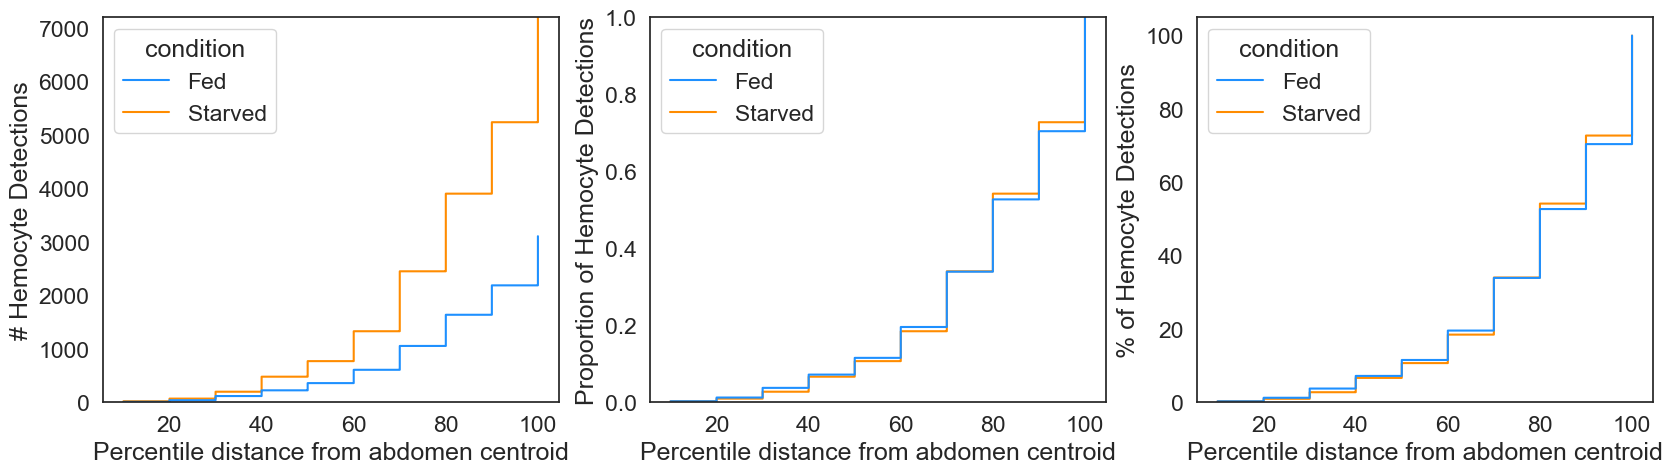

In [38]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile", 
                                              hue="condition", palette=color_scheme,stat="count",
                                              complementary=False, ax=ax[0])
ax[0].set(xlabel='Percentile distance from abdomen centroid', ylabel='# Hemocyte Detections')

sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile", 
                                              hue="condition", palette=color_scheme,stat="proportion",
                                              complementary=False, ax=ax[1])
ax[1].set(xlabel='Percentile distance from abdomen centroid', ylabel='Proportion of Hemocyte Detections')
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile", 
                                              hue="condition", palette=color_scheme,stat="percent",
                                              complementary=False, ax=ax[2])
ax[2].set(xlabel='Percentile distance from abdomen centroid', ylabel='% of Hemocyte Detections')



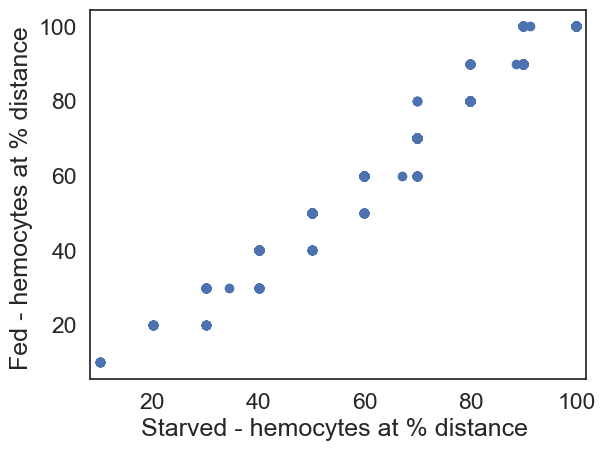

In [84]:
import statsmodels.graphics.gofplots as smgof
import statsmodels.api as sm
#statsmodels.graphics.gofplots.qqplot_2samples(data1, data2, xlabel=None, ylabel=None, line=None, ax=None)[source]¶
starved_perc = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['hemocyte_at_percentile']
fed_perc = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['hemocyte_at_percentile']

pp_starved = sm.ProbPlot(starved_perc)
pp_fed = sm.ProbPlot(fed_perc)
smgof.qqplot_2samples(pp_fed, pp_starved, xlabel="Fed - hemocytes at % distance ",ylabel="Starved - hemocytes at % distance ")
plt.show()


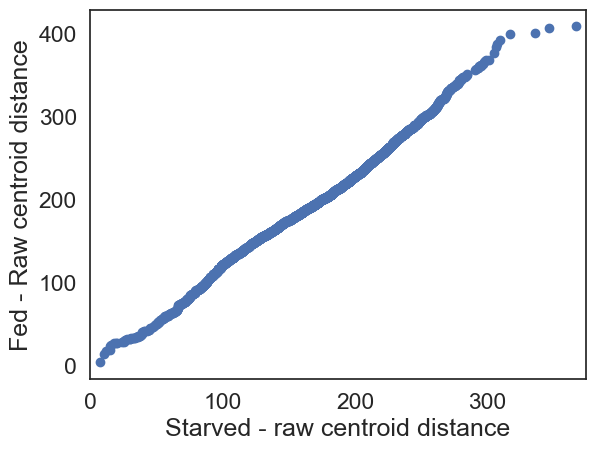

In [85]:
import statsmodels.graphics.gofplots as smgof
import statsmodels.api as sm
#statsmodels.graphics.gofplots.qqplot_2samples(data1, data2, xlabel=None, ylabel=None, line=None, ax=None)[source]¶
starved_perc = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances']
fed_perc = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances']

pp_starved = sm.ProbPlot(starved_perc)
pp_fed = sm.ProbPlot(fed_perc)
smgof.qqplot_2samples(pp_fed, pp_starved, xlabel="Fed - Raw centroid distance",ylabel="Starved - raw centroid distance")
plt.show()